# **User Visited Recommendation System (Content-Filtering)** 
> *Author : Ryan Tan Kang Khen (193190N)*

# **Section 0 – Introduction**
- ***Explain the Machine Learning problem that you are trying to solve very briefly in your JupyterNotebook***
  >For this Jupyter Notebook , I want to recommend different bakeries and baked goods to different users based on the specifc bakery that they have visited and have made purchases from.

  >For frequent users of BAKEin, they usually makes purchases on different bakeries. Once they bought a few items from a bakery, they would want to try out new bakeries based on their purchase history. So this Jupyter Notebook aims to provide new bakery recommendations to users based on their purchase history. 

  >We will be using two type of model: CountVectorizer algorithm and TfidfVectorizer algorithm.

# **Section 1 – Data Collection**
-  ***Describe your data source - where you got the data from (downloaded as a complete dataset online, or put together by yourself from various sources)***
  >Since there were insufficient data on bakeries, I decided to scout around the Internet for existing bakeries data and even restaurants data. After looking around for a week, I found 3 Kaggle Datasets can be useful to combine with each other. 
  1. https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings
  2. https://www.kaggle.com/sulmansarwar/transactions-from-a-bakery 

  >Due to the insufficient data like I mentioned, I had to combine and configure all 2 of the Kaggle datasets into our own. For this Jupyter Notebook, I will be using "chefmozcuisine.csv" and "rating_final.csv" from the 1st Kaggle Link.

  >For the changes of the existing dataset, I firstly changed the cuisines of restaurants to types of bread sold in "chefmozcuisine.csv". The types of bread sold is taken from a column "Item" in the 2nd Kaggle Link Dataset (BreadBasket_DMS.csv)

  >Secondly, I also changed the name of "chefmozcuisine.csv" to "bakeries_location.csv", and changed the name of "rating_final.csv" to "userprofile_visited.csv" so as to identify the dataset better. 

  >Thirdly, I removed the duplicates in "userprofile_visited" to only 1 row for one user and one placeID.Then, I changed the userID and placeID for both datasets to numbers ranging from 1 to 150 and from 1 to 130 respectively and accordingly, so as to identify the index of the data better.

  >Finally, I added a new column called "transactions" in "userprofile_visited.csv", and took the values of the column "Transaction" 2nd Kaggle Link Dataset (BreadBasket_DMS.csv) and placed it in the new column, as this new column is significantly important in tracking the number of items bought by different users. 


- ***Include the codes to load the data***
>Now that we have changed the values in both datasets to suit this model training, we will import both datasets and certain packages into our model. The datasets "bakeries_location.csv" and "userprofile_visited.csv" will be loaded into the models.

In [1]:
#import packages
import io
import pandas as pd
import webbrowser
import os 
import scipy

import ipywidgets as widgets

uploader = widgets.FileUpload(
    accept='/.csv*',  # Accepted file extension'
    multiple=False  # True to accept multiple files upload else False
)

display(uploader) 

FileUpload(value={}, accept='/.csv*', description='Upload')

In [2]:
bakery_df = pd.read_csv('C:/Users/ryant/IT3100 Project 2/dataset_ai/bakeries_location.csv')  

In [3]:
visited_df = pd.read_csv('C:/Users/ryant/IT3100 Project 2/dataset_ai/userprofile_visited.csv')

# **Section 2 – Data Preparation**
- ***Explain how much you understand about the data you have. Any missing fields or invalid images/text?***

  >For the data preparation, I conducted Exploratory Data Analysis (EDA) on the two datasets. It is important to do EDA as it will give us insights on what kind of data are we covering.

  >After conducting EDA on the datasets, I realised that I do not really have to perform any processing as they are pretty much processed with no erroneous values and no missing values. 

- ***Explain what you have to do to process them, or why you do not need to process them if they are already processed***

  >Since there weren't any missing values or improper values, I don't really need to process them as they are already processed.

  >However, I would have to perform feature extraction on "bakeries_location.csv" and "userprofile_visited" as some of the columns included in the datasets are not really needed for this model. I will be focusing on columns that are relevant and heavily used for this Jupyter Notebook. 

- ***Include the codes to prepare the data for training***

  >The following are steps taken to conduct the full EDA and feature extraction. Each cell has specific functions that you can see below. 

In [4]:
#importing necessary libraries
import numpy as np
import pandas as pd
import webbrowser
import os
import scipy  
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

In [5]:
#No.of unique users, bakeries, no. of transactions
print('Unique users: ', visited_df['userID'].nunique())
print('Unique restaurant: ', bakery_df['placeID'].nunique())
print('Total no.of transactions : ', visited_df['transactions'].count())

Unique users:  150
Unique restaurant:  130
Total no.of transactions :  150


In [6]:
# How many transactions performed by users
most_rated_users = visited_df['transactions'].describe()
most_rated_users

count    150.000000
mean       4.100000
std        1.174391
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: transactions, dtype: float64

In [7]:
#amount of bakeries that sells different types of bread
bakery_df['types_of_bread'].value_counts()

Muffins         13
Cakes           10
Croissants      10
Tarts            9
Kringles         9
Curry Puffs      9
Swiss Rolls      9
Strudels         8
Cupcakes         8
Cookies          8
Baos             7
Sandwiches       7
Baked Pizzas     6
Doughnuts        6
Taiyakis         5
Bagels           3
Pies             2
E-Clairs         1
Name: types_of_bread, dtype: int64

In [8]:
visited_df.isnull().sum().sum()

0

In [9]:
bakery_df.isnull().sum().sum()

0

C:\Users\ryant\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transactions', ylabel='count'>

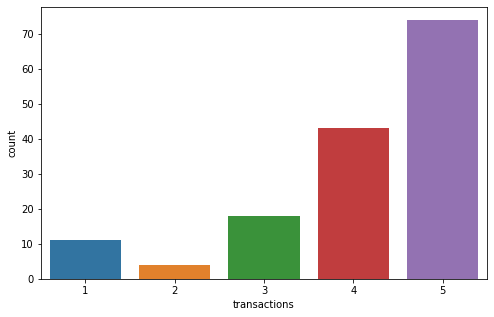

In [10]:
#What's the transactions distribution
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (8,5))
sns.countplot(visited_df['transactions'])

> Now, since there weren't any missing values or any values that need to be replaced, I performed feature extraction on both datasets that are relevant to this model.

In [11]:
bakery_df=bakery_df[['placeID','name','types_of_bread']]

In [12]:
visited_df=visited_df [['userID','placeID','transactions']]

# **Section 3 – Model Training and Experiments**
- ***Explain your choice for the Machine Learning / Deep Learning model*** 
  >- **CountVectorizer Algorithm** for Counting the frequency of all words (types of bread sold), sorts them and grabs the most recurring features. 
  >- **Term Frequency - Inverse Document Frequency Vectorizer (TfidfVectorizer) Algorithm** for extracting the words (types of bread sold) and map it to the bakery names.

Both models involves the use of reference from a Kaggle Python Notebook.
https://www.kaggle.com/sasha18/recommend-books-using-count-tfidf-on-titles 

- ***Include the codes to conduct your experiment(s) and choose the appropriate metrics to see if your model is performing well on the training & validation datasets.***
>- Success metrics for Clustering-Based Learning include 
    - **Test Samples** are used as there were not many options for measuring the success of clustering-based learning.
- ***Make sure that your experiment outputs remain visible in your Notebook submission***

### **Section 3.1- Training/Evaluating CountVectorizer for User Visited Recommendation System**

  > For the CountVectorizer Algorithm, it collects the types of bread sold and uses Cosine Similarity to assign bakeries that sells the same types of bread. 

Reasons to choose CountVectorizer Algorithm
- Returns Float which is a more detailed output
- Simple algorithm – to interpret 
- High accuracy in assigning similar bakeries 

> Let's start with the first model experiment, which imports CountVectorizer and fits the type of bread sold into the algorithm.

In [13]:
#Lets vectorize all these titles
from sklearn.feature_extraction.text import CountVectorizer

#initialize vectorizer
vect = CountVectorizer(analyzer = 'word', ngram_range = (1,2), stop_words = 'english', min_df = 0.002) #min_df = rare words, max_df = most used words
#ngram_range = (1,2) - if used more than  1(value), lots of features or noise

#Fit into the bakery name
vect.fit(bakery_df['types_of_bread'])
bakery_matrix = vect.transform(bakery_df['types_of_bread'])
bakery_matrix.shape

(130, 24)

In [14]:
#Lets find vocabulary/features
features = vect.get_feature_names()
features

['bagels',
 'baked',
 'baked pizzas',
 'baos',
 'cakes',
 'clairs',
 'cookies',
 'croissants',
 'cupcakes',
 'curry',
 'curry puffs',
 'doughnuts',
 'kringles',
 'muffins',
 'pies',
 'pizzas',
 'puffs',
 'rolls',
 'sandwiches',
 'strudels',
 'swiss',
 'swiss rolls',
 'taiyakis',
 'tarts']

In [15]:
#using cosine similarity to find bakeries that sell the same types of bread
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim_name = cosine_similarity(bakery_matrix, bakery_matrix)
cosine_sim_name.shape

(130, 130)

In [16]:
#Get bakeries which are similar to a given bakery name
bakery_id = 100
bakery_df['name'].iloc[bakery_id]

'Sanborns Casa Piedra'

In [17]:
#Find out what features have been considered  by the vectorizer for a given type of bread the bakery_id has sold 
feature_array = np.squeeze(bakery_matrix[bakery_id].toarray()) #squeeze activity matrix into array
idx = np.where(feature_array > 0)
idx[0]
[features[x] for x in idx[0]]

['curry', 'curry puffs', 'puffs']

In [18]:
# Find index of feature
idx[0]

array([ 9, 10, 16], dtype=int64)

In [19]:
#Cosine similarity with other similar bakeries
n = 15 #how many books to be recommended
top_n_idx = np.flip(np.argsort(cosine_sim_name[bakery_id,]), axis = 0)[0:n]
top_n_sim_values = cosine_sim_name[bakery_id, top_n_idx]
top_n_sim_values

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.])

In [20]:
#find top n with values > 0
top_n_idx = top_n_idx[top_n_sim_values > 0]
#Matching bakeries
bakery_df['name'].iloc[top_n_idx]

96                   tacos de la estacion
111    tacos de barbacoa enfrente del Tec
100                  Sanborns Casa Piedra
53             Michiko Restaurant Japones
52                     Restaurante Guerra
84                               Carls Jr
75                                   VIPS
86          Carreton de Flautas y Migadas
73                             palomo tec
Name: name, dtype: object

> The next 2 cell blocks involves a function, in which when the function is called, it takes the bakery name and recommends similar bakeries that sells the same type of bread, based on cosine similairty .

In [21]:
# lets wrap the above code in a function
def return_sim_bakery_name(bakery_id, bakery_matrix, vectorizer, top_n = 10):
    
    # generate sim matrix
    sim_matrix = cosine_similarity(bakery_matrix, bakery_matrix)
    features = vectorizer.get_feature_names()

    top_n_idx = np.flip(np.argsort(sim_matrix[bakery_id,]),axis=0)[0:top_n]
    top_n_sim_values = sim_matrix[bakery_id, top_n_idx]
    
    # find top n with values > 0
    top_n_idx = top_n_idx[top_n_sim_values > 0]
    scores = top_n_sim_values[top_n_sim_values > 0]
    
    
    # find features from the vectorized matrix
    sim_name_idx = bakery_df['name'].iloc[top_n_idx].index
    words = []
    for name_idx in sim_name_idx:
        try:
            feature_array = np.squeeze(bakery_matrix[name_idx,].toarray())
        except:
            feature_array = np.squeeze(bakery_matrix[name_idx,])
        idx = np.where(feature_array > 0)
        words.append([" , ".join([features[i] for i in idx[0]])])
        
    # collate results
    res = pd.DataFrame({"bakery_name" : bakery_df['name'].iloc[bakery_id],"types_of_bread_sold" : bakery_df['types_of_bread'].iloc[bakery_id],
           "sim_bakeries": bakery_df['name'].iloc[top_n_idx].values,"words":words,
           "scores":scores}, columns = ["bakery_name","types_of_bread_sold","sim_bakeries","scores","words"])
    
    
    return res

In [23]:
vect = CountVectorizer(analyzer='word',ngram_range=(1,2),stop_words='english', min_df = 0.001)
vect.fit(bakery_df['types_of_bread'])
bakery_matrix = vect.transform(bakery_df['types_of_bread'])
user_id_input=int(input("Enter a User ID (from 1 to 150)"))
get_user_row=visited_df.loc[visited_df['userID'] == user_id_input]
placeid_visited_by_user=int(get_user_row['placeID'].values)
print(bakery_df['name'][placeid_visited_by_user])
return_sim_bakery_name(placeid_visited_by_user,bakery_matrix,vect,top_n=10)

Enter a User ID (from 1 to 150)34
pizza clasica


,bakery_name,types_of_bread_sold,sim_bakeries,scores,words
0,pizza clasica,Kringles,Restaurante y Pescaderia Tampico,1.0,[kringles]
1,pizza clasica,Kringles,Restaurante El Chivero S.A. de C.V.,1.0,[kringles]
2,pizza clasica,Kringles,Chaires,1.0,[kringles]
3,pizza clasica,Kringles,Restaurante El Cielo Potosino,1.0,[kringles]
4,pizza clasica,Kringles,Gorditas Dona Tota,1.0,[kringles]
5,pizza clasica,Kringles,Rincon Huasteco,1.0,[kringles]
6,pizza clasica,Kringles,Hamburguesas saul,1.0,[kringles]
7,pizza clasica,Kringles,pizza clasica,1.0,[kringles]
8,pizza clasica,Kringles,KFC,1.0,[kringles]


> Below are the test samples which put the CountVectorizer Algorithm model into action

In [24]:
bakery_input_V2=18
return_sim_bakery_name(bakery_input_V2,bakery_matrix,vect,top_n=10)

,bakery_name,types_of_bread_sold,sim_bakeries,scores,words
0,Unicols Pizza,Croissants,El Mundo de la Pasta,1.0,[croissants]
1,Unicols Pizza,Croissants,Pollo_Frito_Buenos_Aires,1.0,[croissants]
2,Unicols Pizza,Croissants,La Posada del Virrey,1.0,[croissants]
3,Unicols Pizza,Croissants,Tortas y hamburguesas el gordo,1.0,[croissants]
4,Unicols Pizza,Croissants,Restaurante Bar Fu-hao,1.0,[croissants]
5,Unicols Pizza,Croissants,Carnitas Mata Calle 16 de Septiembre,1.0,[croissants]
6,Unicols Pizza,Croissants,Unicols Pizza,1.0,[croissants]
7,Unicols Pizza,Croissants,Restaurant Orizatlan,1.0,[croissants]
8,Unicols Pizza,Croissants,Potzocalli,1.0,[croissants]
9,Unicols Pizza,Croissants,cafe punta del cielo,1.0,[croissants]


In [25]:
bakery_input_V3=60
return_sim_bakery_name(bakery_input_V3,bakery_matrix,vect,top_n=10)

,bakery_name,types_of_bread_sold,sim_bakeries,scores,words
0,Restaurant la Chalita,Swiss Rolls,Log Yin,1.0,"[rolls , swiss , swiss rolls]"
1,Restaurant la Chalita,Swiss Rolls,Mikasa,1.0,"[rolls , swiss , swiss rolls]"
2,Restaurant la Chalita,Swiss Rolls,Paniroles,1.0,"[rolls , swiss , swiss rolls]"
3,Restaurant la Chalita,Swiss Rolls,Sushi Itto,1.0,"[rolls , swiss , swiss rolls]"
4,Restaurant la Chalita,Swiss Rolls,Gordas de morales,1.0,"[rolls , swiss , swiss rolls]"
5,Restaurant la Chalita,Swiss Rolls,McDonalds Centro,1.0,"[rolls , swiss , swiss rolls]"
6,Restaurant la Chalita,Swiss Rolls,Tortas Locas Hipocampo,1.0,"[rolls , swiss , swiss rolls]"
7,Restaurant la Chalita,Swiss Rolls,La Cantina Restaurante,1.0,"[rolls , swiss , swiss rolls]"
8,Restaurant la Chalita,Swiss Rolls,Restaurant la Chalita,1.0,"[rolls , swiss , swiss rolls]"


 > As seen from the results, it works! It managed to recommend similar bakeries that sells croissants or swiss rolls respectively, based on the input bakery that sells croissants or swiss rolls.

### **Section 3.2- Training/Evaluating TfidfVectorizer for User Visited Recommendation System**

  > For the TfidfVectorizer Algorithm, it collects the types of bread sold and maps the type of bread sold to every bakery name. 

Reasons to choose CountVectorizer Algorithm
- Returns Integer output which is more simplistic
- Simple algorithm – to interpret 
- Higher accuracy than CountVectorizer in assigning similar bakeries 

> Let's start the second experiment model by importing the TfidfVectorizer and fitting the types of bread sold into the algorithm.

In [26]:
tfidf = TfidfVectorizer(stop_words='english')
bakery_df['types_of_bread'] = bakery_df['types_of_bread'].fillna('')
#Construct the required TF-IDF matrix by applying the fit_transform method on the overview feature
overview_matrix = tfidf.fit_transform(bakery_df['types_of_bread'])
#Output the shape of tfidf  _matrix
overview_matrix.shape

(130, 21)

In [27]:
#purpose of linear kernel is to take the linearly seperable data and seperate it with a diagonal line
similarity_matrix = linear_kernel(overview_matrix,overview_matrix)
similarity_matrix

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [28]:
#Lets find vocabulary/features
features = tfidf.get_feature_names()
features

['bagels',
 'baked',
 'baos',
 'cakes',
 'clairs',
 'cookies',
 'croissants',
 'cupcakes',
 'curry',
 'doughnuts',
 'kringles',
 'muffins',
 'pies',
 'pizzas',
 'puffs',
 'rolls',
 'sandwiches',
 'strudels',
 'swiss',
 'taiyakis',
 'tarts']

In [29]:
#mapping the types of bread to its bakery name
mapping = pd.Series(bakery_df.index,index = bakery_df['name'])
mapping

name
Kiku Cuernavaca                     0
puesto de tacos                     1
El Rinc�n de San Francisco          2
little pizza Emilio Portes Gil      3
carnitas_mata                       4
                                 ... 
Chaires                           125
Sushi Itto                        126
Paniroles                         127
Restaurant Bar Coty y Pablo       128
sirloin stockade                  129
Length: 130, dtype: int64

> The next 2 cell blocks involves a function, in which when the function is called, it takes the bakery name and recommends similar bakeries that sells the same type of bread ,  based on the mapping table that maps bakery names to the types of bread sold.

In [30]:
def recommend_bakeries_based_on_bread(df,bakery_input):

  bakery_index = mapping[bakery_input]
  #get similarity values with other movies
  #similarity_score is the list of index and similarity matrix
  similarity_score = list(enumerate(similarity_matrix[bakery_index]))
  #sort in descending order the similarity score of movie inputted with all the other movies
  similarity_score = sorted(similarity_score, key=lambda x: x[1], reverse=True)
  # Get the scores of the 15 most similar movies. Ignore the firs t movie.
  similarity_score = similarity_score[1:15]
  #return movie names using the mapping series
  bakery_indices = [i[0] for i in similarity_score]
  return bakery_df.iloc[bakery_indices]

In [31]:
#asking for the userID input to take the placeID that they visited
user_input=int(input("Enter a User ID (from 1 to 150)"))
get_user_row=visited_df.loc[visited_df['userID'] == user_input]
no_of_transactions_by_user = int(get_user_row['transactions'].values)
#checks if the number of transactions of the user is above 2 -> assuming that the number of transactions that is below 2 shows that the user is uninterested
if no_of_transactions_by_user > 2:
  placeid_visited_by_user=int(get_user_row['placeID'].values)
  
  #gets the bakery name based on the placeID they visited
  get_bakery_row = bakery_df.loc[bakery_df['placeID'] == placeid_visited_by_user]
  bakery_name=get_bakery_row['name'].values
  bakery_input=''.join(bakery_name)
  print("We are recommending bakeries similar to the bakery you have purchased from:")
  print("Bakery Name: {}".format(bakery_input))
  print("No of Transactions: {}".format(no_of_transactions_by_user))
  print(recommend_bakeries_based_on_bread(bakery_df,bakery_input))
else:
  print("Sorry! You do not have enough transactions! Please purchase more breads from bakeries or check out other recommendations!")

Enter a User ID (from 1 to 150)67
We are recommending bakeries similar to the bakery you have purchased from:
Bakery Name: KFC
No of Transactions: 5
     placeID                                 name types_of_bread
30        31     Restaurante y Pescaderia Tampico       Kringles
59        60  Restaurante El Chivero S.A. de C.V.       Kringles
85        86                    Hamburguesas saul       Kringles
87        88                      Rincon Huasteco       Kringles
89        90                   Gorditas Dona Tota       Kringles
102      103                        pizza clasica       Kringles
113      114        Restaurante El Cielo Potosino       Kringles
125      126                              Chaires       Kringles
0          1                      Kiku Cuernavaca         Bagels
1          2                      puesto de tacos          Cakes
2          3           El Rinc�n de San Francisco     Sandwiches
3          4       little pizza Emilio Portes Gil           Baos
4     

> Below are the test samples which put the TfidfVectorizer into action

In [32]:
bakery_input_V2="tacos abi"
print(recommend_bakeries_based_on_bread(bakery_df,bakery_input_V2))

     placeID                               name types_of_bread
34        35         El Rincon de San Francisco       Strudels
42        43            Restaurante El Reyecito       Strudels
57        58  Restaurante la Parroquia Potosina       Strudels
91        92                  Chilis Cuernavaca       Strudels
105      106       Restaurante Bar El Gallinero       Strudels
122      123                          tacos abi       Strudels
128      129        Restaurant Bar Coty y Pablo       Strudels
0          1                    Kiku Cuernavaca         Bagels
1          2                    puesto de tacos          Cakes
2          3         El Rinc�n de San Francisco     Sandwiches
3          4     little pizza Emilio Portes Gil           Baos
4          5                      carnitas_mata           Baos
5          6           Restaurant los Compadres       Cupcakes
6          7                 Taqueria EL amigo            Baos


In [33]:
bakery_input_V3="little pizza Emilio Portes Gil"
print(recommend_bakeries_based_on_bread(bakery_df,bakery_input_V3))

     placeID                        name types_of_bread
4          5               carnitas_mata           Baos
6          7          Taqueria EL amigo            Baos
116      117        Restaurante Tiberius           Baos
117      118             Cabana Huasteca           Baos
118      119          Gorditas Dona Tota           Baos
120      121                 La Virreina           Baos
0          1             Kiku Cuernavaca         Bagels
1          2             puesto de tacos          Cakes
2          3  El Rinc�n de San Francisco     Sandwiches
5          6    Restaurant los Compadres       Cupcakes
7          8                   shi ro ie        Muffins
8          9    Pollo_Frito_Buenos_Aires     Croissants
9         10        la Estrella de Dimas        Muffins
10        11              Restaurante 75        Cookies


> As you can see, it managed to recommend similar bakeries that sells Strudels or Baos, based on the input bakery that sells Baos or Strudels respectively.